In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,emotion,gender,industry,revisit,store,time_spent
0,6,surprise,f,cos,0,1,25
1,15,surprise,f,cos,0,1,24
2,20,surprise,f,cos,0,1,28
3,19,neutral,f,cos,1,1,27
4,17,surprise,f,cos,0,1,28


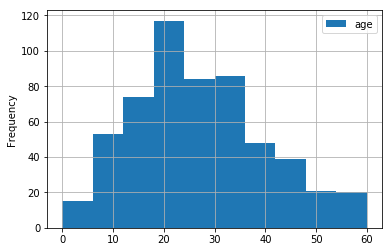

In [4]:
d_age = pd.DataFrame(df["age"])
plot_age = d_age.plot.hist(grid=True)

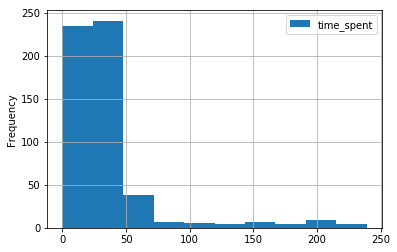

In [5]:
d_time = pd.DataFrame(df["time_spent"])
plot_time = d_time.plot.hist(grid=True)

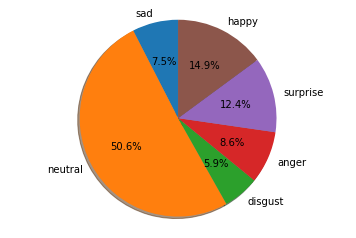

In [6]:
emo_plt = dict(pd.value_counts(df['emotion']))
fig_emo, ax_emo = plt.subplots()
ax_emo.pie(emo_plt.values(), labels=emo_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_emo.axis('equal')
plt.show()

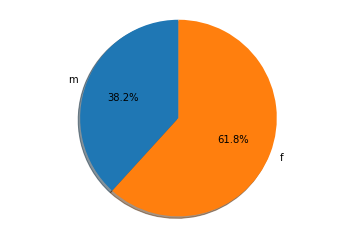

In [7]:
gender_plt = dict(pd.value_counts(df['gender']))
fig_gen, ax_gen = plt.subplots()
ax_gen.pie(gender_plt.values(), labels=gender_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_gen.axis('equal')
plt.show()

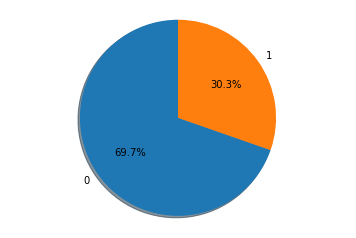

In [8]:
rev_plt = dict(pd.value_counts(df['revisit']))
fig_rev, ax_rev = plt.subplots()
ax_rev.pie(rev_plt.values(), labels=rev_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_rev.axis('equal')
plt.show()

In [9]:
data = df['industry']
values = array(data)

print pd.value_counts(values)

app      167
elec     142
toys      93
jewel     63
cos       55
auto      37
dtype: int64


In [10]:
label_enc_industry = LabelEncoder()
int_enc_industry = label_enc_industry.fit_transform(values)
int_enc_industry = int_enc_industry.reshape(len(int_enc_industry), 1)

In [11]:
onehot_enc_industry = OneHotEncoder(sparse=False)
onehot_enc_industry = onehot_enc_industry.fit_transform(int_enc_industry)

rev_map_ind = lambda row: label_enc_industry.inverse_transform(argmax(row))

In [12]:
for i in range(df.industry.unique().shape[0]):
    col_name = label_enc_industry.inverse_transform(i)
    col_data = onehot_enc_industry[:,i]
    df[col_name] = col_data

In [13]:
label_encoder_emotion = LabelEncoder()
df["enc_emotion"] = label_encoder_emotion.fit_transform(df.emotion)
label_encoder_gender = LabelEncoder()
df["enc_gender"]= label_encoder_emotion.fit_transform(df.gender)

In [14]:
cols_X = ['age', 'revisit', 'time_spent', 'enc_emotion', 'enc_gender']
cols_y = ['app', 'auto', 'cos', 'elec', 'jewel', 'toys']
X = df[cols_X].values
y = df[cols_y].values

In [15]:
from sklearn.ensemble import RandomForestClassifier as clf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
ind_clf = clf(class_weight='balanced', random_state=69)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=69)

### Number of Entries for Industries
###### app      167
###### elec     142
###### toys      93
###### jewel     63
###### cos       55
###### auto      37

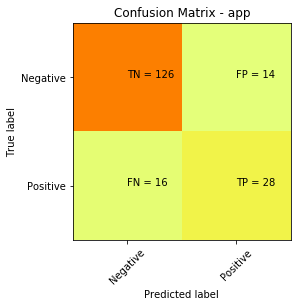

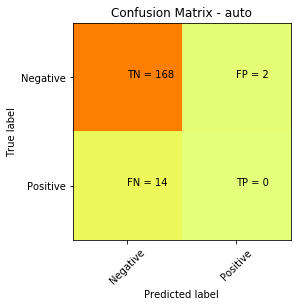

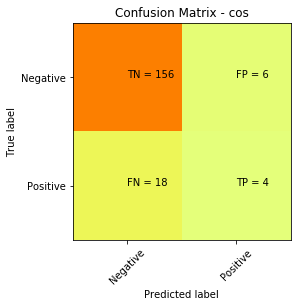

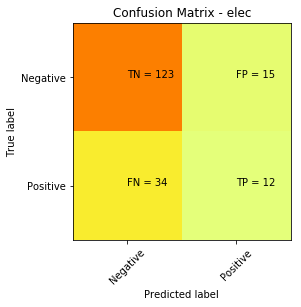

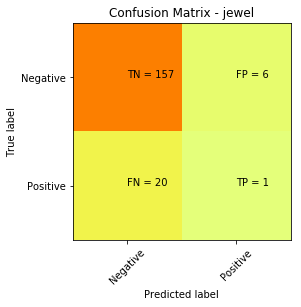

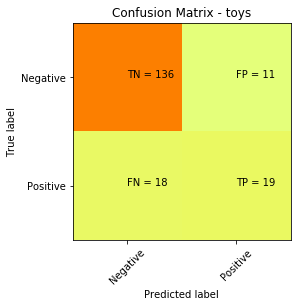

In [18]:
score_map = dict()
for i in range(len(cols_y)):
    ind_clf.fit(X_train,y_train[:,i])
    ind_name = label_enc_industry.inverse_transform(i)
    y_test_p = y_test[:,i]
    y_pred_p = ind_clf.predict(X_test)
    cm = confusion_matrix(y_test_p, y_pred_p)
    accuracy = accuracy_score(y_test_p,y_pred_p)
    score_map[ind_name] = cm.ravel()+tuple([accuracy])
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - %s'%ind_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [19]:
print score_map

{'cos': array([156.86956522,   6.86956522,  18.86956522,   4.86956522]), 'elec': array([123.73369565,  15.73369565,  34.73369565,  12.73369565]), 'auto': array([168.91304348,   2.91304348,  14.91304348,   0.91304348]), 'app': array([126.83695652,  14.83695652,  16.83695652,  28.83695652]), 'jewel': array([157.85869565,   6.85869565,  20.85869565,   1.85869565]), 'toys': array([136.8423913,  11.8423913,  18.8423913,  19.8423913])}
